In [ ]:
datapath = "../data"

In [26]:
pd.read_csv(os.path.join(datapath, "EGs.csv"))[f'FIPER_{tissue}'].dropna().values

array(['AAMP', 'AARS1', 'AATF', ..., 'ZNHIT2', 'ZNHIT6', 'ZPR1'],
      dtype=object)

Text(0.5, 0, 'no. Genes')

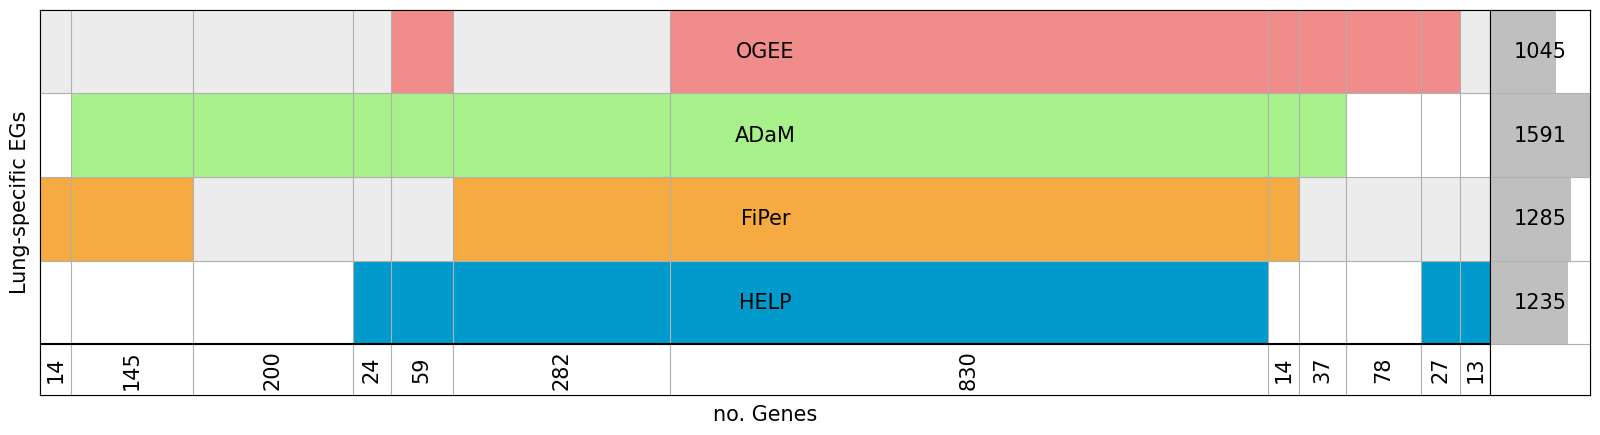

In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from supervenn import supervenn
datapath = "../data"
tissue = 'Lung'
# load labeling
df = pd.read_csv(os.path.join(datapath, "EGs.csv"))
df_help = pd.read_csv(os.path.join(datapath, f"{tissue}_HELP.csv"), index_col=0)
# load benchmarks

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle[0] = '#009ACD'   # HELP
color_cycle[1] = '#f5aa42' # FiPer
color_cycle[2] = '#a8f089' # ADaM
color_cycle[3] = '#f08c89' # OGEE
sets = [
        set(df_help[df_help['label']=='E'].index.values),
        set(df[f'FIPER_{tissue}'].dropna().values),
        set(df[f'ADAM_{tissue}'].dropna().values),
        set(df[f'OGEE_{tissue}'].dropna().values),
       ]
labels = ['HELP', 'FiPer', 'ADaM', 'OGEE']
plt.figure(figsize=(20, 5))
supervenn(sets, labels, widths_minmax_ratio=0.05, side_plots='right', color_cycle=color_cycle, bar_alpha=1.0, rotate_col_annotations=True, fontsize=15)
plt.ylabel(f'{tissue}-specific EGs', fontsize = 15)
plt.xlabel('no. Genes', fontsize = 15)
#plt.savefig("labelling_svenn.jpg", dpi=600)

# Intersection of HELP common with golden standards

Text(0.5, 0, 'no. Genes')

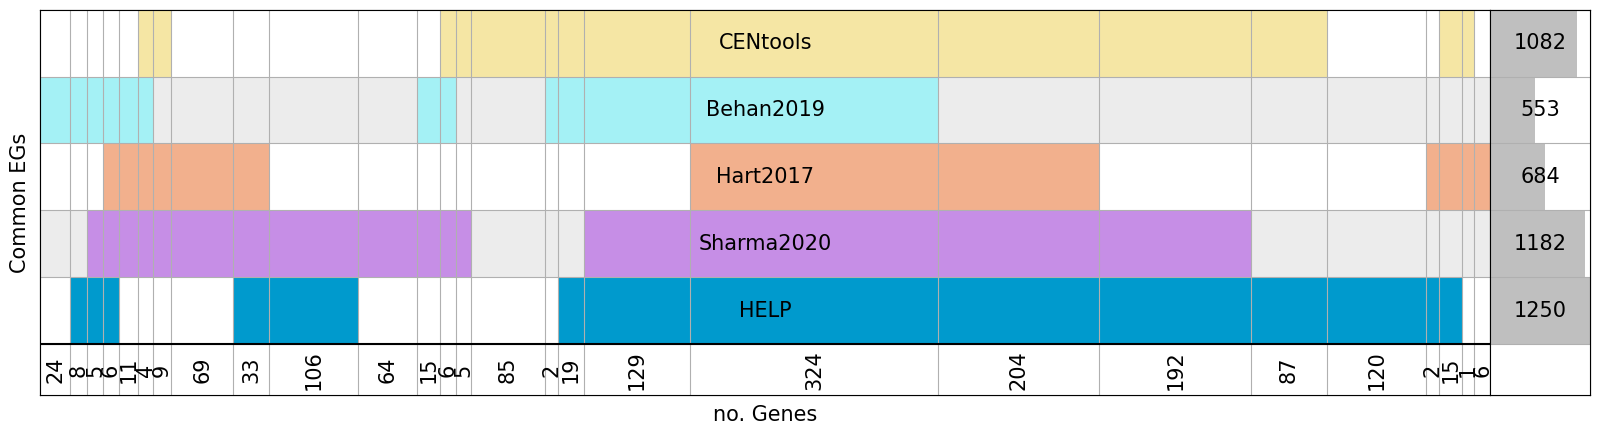

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from supervenn import supervenn
datapath = "../data"
# load labeling
df_help = pd.read_csv(os.path.join(datapath, f"PanTissue_group_HELP.csv"), index_col=0)
df_b0 = pd.read_csv(os.path.join(datapath, "Sharma2020.txt"), index_col=0)
df_b1 = pd.read_csv(os.path.join(datapath, "Hart2017.txt"), index_col=0)
df_b2 = pd.read_csv(os.path.join(datapath, "Behan2019.txt"), index_col=0)
df_b3 = pd.read_csv(os.path.join(datapath, "CENtools.txt"), index_col=0)
# load benchmarks

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle[0] = '#009ACD'
color_cycle[1] = '#c68ee6' 
color_cycle[2] = '#f2b08d'
color_cycle[3] = '#a4f1f5'
color_cycle[4] = '#f5e6a4'
sets = [
        set(df_help[df_help['label']=='E'].index.values),
        set(df_b0.index.values),
        set(df_b1.index.values),
        set(df_b2.index.values),
        set(df_b3.index.values),
       ]
labels = ['HELP', 'Sharma2020', 'Hart2017', 'Behan2019', 'CENtools']
plt.figure(figsize=(20, 5))
supervenn(sets, labels, widths_minmax_ratio=0.05, side_plots='right', color_cycle=color_cycle, bar_alpha=1.0, rotate_col_annotations=True, fontsize=15)
plt.ylabel(f'Common EGs', fontsize = 15)
plt.xlabel('no. Genes', fontsize = 15)
#plt.savefig("labelling_svenn.jpg", dpi=600)